<a href="https://colab.research.google.com/github/luuloi/GWAS_Introduction_2023/blob/main/05_GWAS_Quantitative_Traits_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Testing with Quantitative Traits
Analysis of Blood Pressure data with R

In [2]:
# Load data into R
bpdata = read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/bpdata.csv", header=TRUE)

The **bpdata.csv** dataset contains diastolic and systolic blood pressure measurements for 1000 individuals, and genotype data for 11 SNPs in a candidate gene for blood pressure. Covariates such as gender (sex) and body mass index (bmi) are included as well.

In [3]:
# View the first few lines of the bpdata
head(bpdata)

,X,sex,sbp,dbp,snp1,snp2,snp3,snp4,snp5,snp6,snp7,snp8,snp9,snp10,snp11,bmi
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,FEMALE,171,89,CC,TT,TT,TT,CC,GG,AA,TT,TT,CC,TT,25
2,2,MALE,160,99,TT,TT,CC,NA,CC,AG,AT,CC,CT,CC,CT,35
3,3,FEMALE,142,83,CT,TT,TC,CT,CC,AG,TT,CC,TT,CT,TT,34
4,4,MALE,126,71,CT,TT,CC,NA,CC,AA,TT,CC,TT,CT,CT,32
5,5,FEMALE,126,82,CT,TT,CC,CC,CC,AA,TT,CC,TT,CT,CT,34
6,6,FEMALE,132,89,CT,TT,CC,CC,CC,NA,TT,CC,TT,TT,CT,25


In [4]:
# Get information about the types of variables in the bpdata
str(bpdata)

'data.frame':	1000 obs. of  16 variables:
 $ X    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex  : chr  "FEMALE" "MALE" "FEMALE" "MALE" ...
 $ sbp  : int  171 160 142 126 126 132 136 121 120 136 ...
 $ dbp  : int  89 99 83 71 82 89 58 87 69 88 ...
 $ snp1 : chr  "CC" "TT" "CT" "CT" ...
 $ snp2 : chr  "TT" "TT" "TT" "TT" ...
 $ snp3 : chr  "TT" "CC" "TC" "CC" ...
 $ snp4 : chr  "TT" NA "CT" NA ...
 $ snp5 : chr  "CC" "CC" "CC" "CC" ...
 $ snp6 : chr  "GG" "AG" "AG" "AA" ...
 $ snp7 : chr  "AA" "AT" "TT" "TT" ...
 $ snp8 : chr  "TT" "CC" "CC" "CC" ...
 $ snp9 : chr  "TT" "CT" "TT" "TT" ...
 $ snp10: chr  "CC" "CC" "CT" "CT" ...
 $ snp11: chr  "TT" "CT" "TT" "CT" ...
 $ bmi  : int  25 35 34 32 34 25 22 33 21 29 ...


# 1. Perform a linear regression in R of systolic blood pressure (sbp) on SNP3 using lm() for different models.

## Additive model

In [6]:
# First create a genotype variable with an additive coding based on the counts of the number of T alleles
bpdata$n.minor <- (bpdata$snp3=="TC") +(bpdata$snp3=="CT")+2*(bpdata$snp3=="TT")
head(bpdata$n.minor)
head(bpdata)

[1] 2 0 1 0 0 0

,X,sex,sbp,dbp,snp1,snp2,snp3,snp4,snp5,snp6,snp7,snp8,snp9,snp10,snp11,bmi,n.minor
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1,FEMALE,171,89,CC,TT,TT,TT,CC,GG,AA,TT,TT,CC,TT,25,2
2,2,MALE,160,99,TT,TT,CC,NA,CC,AG,AT,CC,CT,CC,CT,35,0
3,3,FEMALE,142,83,CT,TT,TC,CT,CC,AG,TT,CC,TT,CT,TT,34,1
4,4,MALE,126,71,CT,TT,CC,NA,CC,AA,TT,CC,TT,CT,CT,32,0
5,5,FEMALE,126,82,CT,TT,CC,CC,CC,AA,TT,CC,TT,CT,CT,34,0
6,6,FEMALE,132,89,CT,TT,CC,CC,CC,NA,TT,CC,TT,TT,CT,25,0


In [8]:
# Now perform a linear regression analysis with the additive genotype coding variable
lm1 = lm(sbp~n.minor, data=bpdata)
summary(lm1)


Call:
lm(formula = sbp ~ n.minor, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.974 -12.418  -0.974  10.582  60.582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 140.4179     0.7219 194.506   <2e-16 ***
n.minor       2.5556     1.0615   2.407   0.0163 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.33 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.006014,	Adjusted R-squared:  0.004976 
F-statistic: 5.796 on 1 and 958 DF,  p-value: 0.01625


In [9]:
# Confidence intervals of the effect estimates
confint.default(lm1)

,2.5 %,97.5 %
(Intercept),139.0029685,141.832849
n.minor,0.4750661,4.636205


In [11]:
# Apply the same inference on the association with an additive model
# when the genotype variable is coded based on the number of copies of the C allele
bpdata$n.minorC<- (bpdata$snp3=="TC") + (bpdata$snp3=="CT")+ 2*(bpdata$snp3=="CC")
head(bpdata$n.minorC)

lm1a = lm(sbp~n.minorC, data=bpdata)
summary(lm1a)

[1] 0 2 1 2 2 2


Call:
lm(formula = sbp ~ n.minorC, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.974 -12.418  -0.974  10.582  60.582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  145.529      1.809  80.446   <2e-16 ***
n.minorC      -2.556      1.062  -2.407   0.0163 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.33 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.006014,	Adjusted R-squared:  0.004976 
F-statistic: 5.796 on 1 and 958 DF,  p-value: 0.01625


## Dominant effect model for T allele.

In [12]:
# Create a variable that has a value of
# 1 for genotypes with at least 1 T allele, and 0 for the genotype that is CC
bpdata$domvar <- (bpdata$snp3=="TC") | (bpdata$snp3=="TT")
with(bpdata, table(domvar, snp3))

       snp3
domvar   CC  TC  TT
  FALSE 621   0   0
  TRUE    0 304  35

In [14]:
# Perform the linear regression analysis for the dominant coded genotype variable and obtain confident intervals
lm2 = lm(sbp~domvar, data=bpdata)
summary(lm2)


Call:
lm(formula = sbp ~ domvar, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.218 -12.428  -0.823  10.572  60.572 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  140.428      0.736 190.801   <2e-16 ***
domvarTRUE     2.790      1.238   2.253   0.0245 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.34 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.005269,	Adjusted R-squared:  0.00423 
F-statistic: 5.074 on 1 and 958 DF,  p-value: 0.02451


In [15]:
confint.default(lm2)

,2.5 %,97.5 %
(Intercept),138.9858186,141.870864
domvarTRUE,0.3624521,5.217443


## Recessive model for T allele

In [16]:
bpdata$recvar <- (bpdata$snp3=="TT")
with(bpdata, table(recvar, snp3))

       snp3
recvar   CC  TC  TT
  FALSE 621 304   0
  TRUE    0   0  35

In [17]:
# Linear regression for the recessive genotype variable and CI
lm3 = lm(sbp~recvar, data=bpdata)
summary(lm3)


Call:
lm(formula = sbp ~ recvar, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.251 -12.501  -1.251  10.749  59.749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  141.251      0.604 233.854   <2e-16 ***
recvarTRUE     4.463      3.163   1.411    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.37 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.002074,	Adjusted R-squared:  0.001032 
F-statistic: 1.991 on 1 and 958 DF,  p-value: 0.1586


In [18]:
confint.default(lm3)

,2.5 %,97.5 %
(Intercept),140.06697,142.43465
recvarTRUE,-1.73658,10.66353


## Degree of freedom model

In [19]:
# Linear regression for 2 parameter model
lm4 = lm(sbp~snp3, data=bpdata)
summary(lm4)


Call:
lm(formula = sbp ~ snp3, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.931 -12.428  -0.931  10.572  60.572 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 140.4283     0.7361 190.773   <2e-16 ***
snp3TC        2.5026     1.2840   1.949   0.0516 .  
snp3TT        5.2859     3.1868   1.659   0.0975 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.34 on 957 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.006019,	Adjusted R-squared:  0.003942 
F-statistic: 2.898 on 2 and 957 DF,  p-value: 0.05563


In [20]:
# CI 95%
confint.default(lm4)

,2.5 %,97.5 %
(Intercept),138.98560975,141.871073
snp3TC,-0.01405184,5.019211
snp3TT,-0.96007686,11.531966


In [34]:
# Check NA values in snp3 column
sum(is.na(bpdata$snp3))

[1] 40

In [36]:
clean.data <- bpdata[complete.cases(bpdata[,c("snp3")]),]
lm4 = lm(sbp~snp3, data=clean.data)
lm.null = lm(sbp~1, data=clean.data)
anova(lm.null, lm4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,959,323966.8,NA,NA,NA,NA
2,957,322016.8,2,1950.071,2.897703,0.05563383


# 2. Provide plots illustrating the relationship between sbp and the three genotypes at SNP3 using additive model.

Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


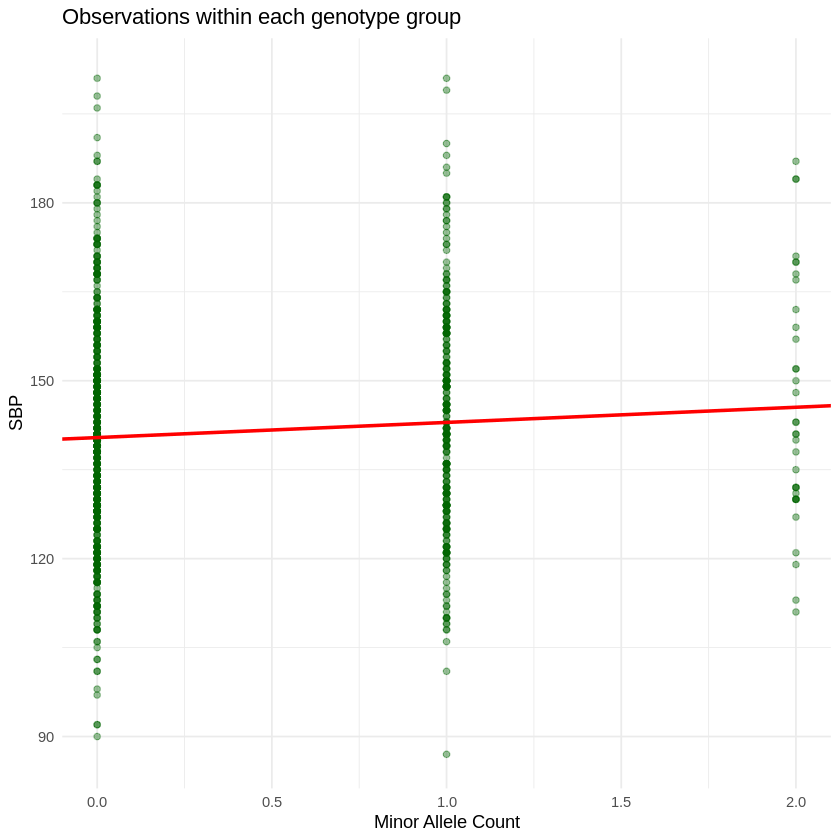

In [66]:
# Plot of SBP versus minor allele count for snp3 with linear regression line
library(ggplot2)
ggplot(bpdata, aes(x = n.minor, y = sbp)) +
  geom_point(color = "darkgreen", alpha=0.4) +
  geom_abline(intercept = coef(lm1)[1], slope = coef(lm1)[2], color = "red", size = 1) +
  labs(x = "Minor Allele Count", y = "SBP", title = "Observations within each genotype group") +
  theme_minimal()

Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


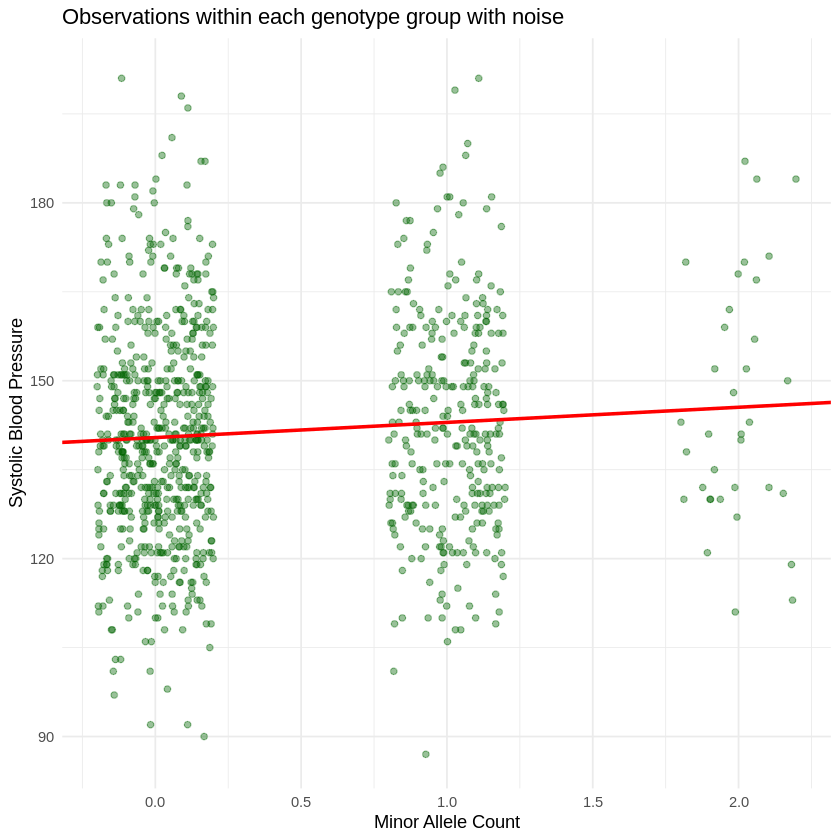

In [108]:
# Add noise to the points for better visualization of how many observations there are within each genotype group
ggplot(bpdata, aes(x = jitter(n.minor), y = sbp)) +
  geom_point(color = "darkgreen", alpha=0.4) +
  geom_abline(intercept = coef(lm1)[1], slope = coef(lm1)[2], color = "red", size = 1) +
  labs(x = "Minor Allele Count", y = "Systolic Blood Pressure", title = "Observations within each genotype group with noise") +
  theme_minimal()

Warning message:
“Removed 40 rows containing missing values (`stat_boxplot()`).”


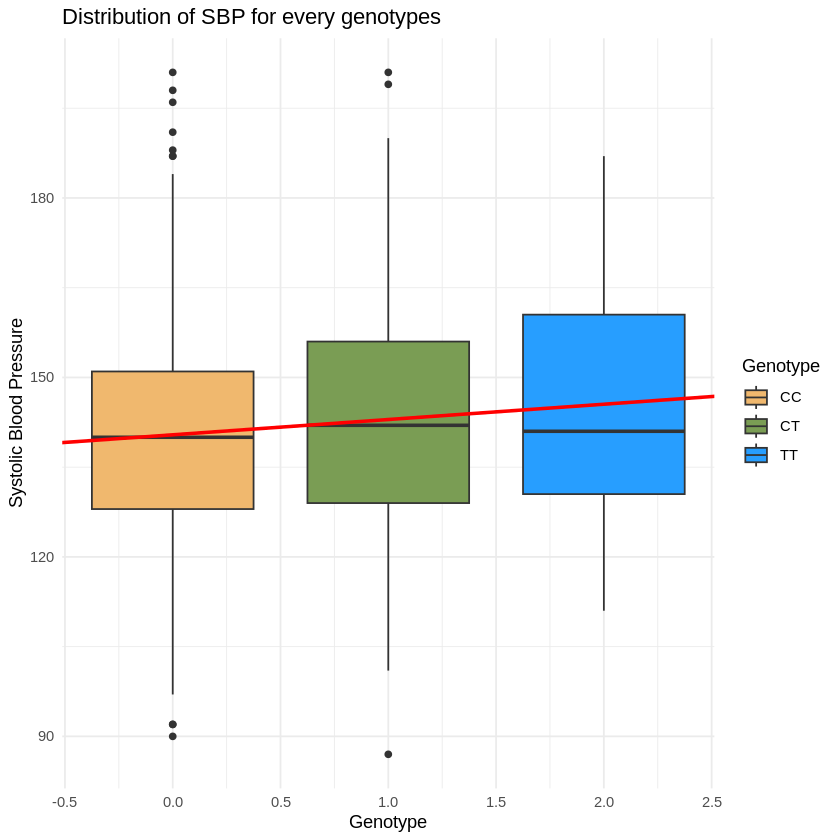

In [109]:
# Boxplot with a regression line
ggplot(bpdata, aes(y=sbp, x=n.minor, fill=factor(n.minor))) +
  geom_boxplot() +
  geom_abline(intercept = coef(lm1)[1], slope = coef(lm1)[2], color = "red", size = 1) +
  labs(x = "Genotype", y = "Systolic Blood Pressure", title = "Distribution of SBP for every genotypes") +
  scale_fill_manual(values = c("#F0B86E", "#7A9D54", "#279EFF"), labels = c("CC", "CT", "TT")) +
  theme_minimal() +
  theme(legend.position = "right") +
  guides(fill = guide_legend(title = "Genotype"))

# 3. Now redo the linear regression analysis of sbp from question 2 for the additive model, but this time adjust for sex and bmi. Do the results change?

In [43]:
# Linear regression of sbp for the additive model with covariates
lm1adj = lm(sbp~n.minor + sex + bmi, data=bpdata)
summary(lm1adj)


Call:
lm(formula = sbp ~ n.minor + sex + bmi, data = bpdata)

Residuals:
   Min     1Q Median     3Q    Max 
-58.83 -12.81  -0.82  11.58  57.80 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 145.85380    3.00271  48.574  < 2e-16 ***
n.minor       2.63566    1.05434   2.500   0.0126 *  
sexMALE      -4.77580    1.17642  -4.060 5.32e-05 ***
bmi          -0.09837    0.09481  -1.038   0.2997    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.19 on 955 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.02402,	Adjusted R-squared:  0.02096 
F-statistic: 7.836 on 3 and 955 DF,  p-value: 3.608e-05


In [42]:
# CI
confint.default(lm1adj)

,2.5 %,97.5 %
(Intercept),139.9685971,151.73899665
n.minor,0.5691929,4.70213658
sexMALE,-7.0815507,-2.47004973
bmi,-0.2842037,0.08745441


# 4. Perform a linear regression with all 11 SNPs included as predictors.

In [44]:
lmall = lm(sbp ~ snp1+snp2+snp3+snp4+snp5+snp6+snp7+snp8+snp9+snp10+snp11, data=bpdata)
summary(lmall)


Call:
lm(formula = sbp ~ snp1 + snp2 + snp3 + snp4 + snp5 + snp6 + 
    snp7 + snp8 + snp9 + snp10 + snp11, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.722 -11.967  -0.703  11.021  61.704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 133.1726    12.4033  10.737   <2e-16 ***
snp1CT       -1.7048     4.5991  -0.371    0.711    
snp1TT        1.9319     8.2839   0.233    0.816    
snp2AT        0.7347     5.5923   0.131    0.896    
snp2TT       -0.5118     6.9317  -0.074    0.941    
snp3TC        4.7672     5.0211   0.949    0.343    
snp3TT        6.6913     9.7904   0.683    0.495    
snp4CT       -0.4778     3.5501  -0.135    0.893    
snp4TT        2.3431     6.4874   0.361    0.718    
snp5CT        1.1896     3.0462   0.391    0.696    
snp5TT       -2.2787     7.5490  -0.302    0.763    
snp6AG       -3.0266     2.0697  -1.462    0.144    
snp6GG        2.1230     4.6650   0.455    0.649    
snp7AT       -3.0873     

In [45]:
# Model above with sex and bmi included as predictors
lmalladj<- lm(sbp~snp1+snp2+snp3+snp4+snp5+snp6+snp7+snp8+snp9+snp10+snp11+sex+bmi,data=bpdata)
summary(lmalladj)


Call:
lm(formula = sbp ~ snp1 + snp2 + snp3 + snp4 + snp5 + snp6 + 
    snp7 + snp8 + snp9 + snp10 + snp11 + sex + bmi, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.174 -12.355  -0.629  11.250  59.791 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.91819   12.98670  10.620   <2e-16 ***
snp1CT       -1.12301    4.60167  -0.244   0.8073    
snp1TT        2.63061    8.28860   0.317   0.7511    
snp2AT        0.22237    5.58086   0.040   0.9682    
snp2TT       -1.03410    6.91365  -0.150   0.8811    
snp3TC        4.96410    5.01294   0.990   0.3224    
snp3TT        7.37868    9.78154   0.754   0.4509    
snp4CT       -0.35549    3.54132  -0.100   0.9201    
snp4TT        2.22937    6.46966   0.345   0.7305    
snp5CT        1.05751    3.04173   0.348   0.7282    
snp5TT       -2.05836    7.53421  -0.273   0.7848    
snp6AG       -3.03433    2.06696  -1.468   0.1425    
snp6GG        1.98216    4.66029   0.425   0.6707    

In [49]:
# Another way to do the regression analysis in R without having to write all of the predictors
lm5 = lm(sbp ~ ., data=bpdata[, c(2:3, 5:16)])
summary(lm5)


Call:
lm(formula = sbp ~ ., data = bpdata[, c(2:3, 5:16)])

Residuals:
    Min      1Q  Median      3Q     Max 
-53.174 -12.355  -0.629  11.250  59.791 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.91819   12.98670  10.620   <2e-16 ***
sexMALE      -3.42337    1.35814  -2.521   0.0119 *  
snp1CT       -1.12301    4.60167  -0.244   0.8073    
snp1TT        2.63061    8.28860   0.317   0.7511    
snp2AT        0.22237    5.58086   0.040   0.9682    
snp2TT       -1.03410    6.91365  -0.150   0.8811    
snp3TC        4.96410    5.01294   0.990   0.3224    
snp3TT        7.37868    9.78154   0.754   0.4509    
snp4CT       -0.35549    3.54132  -0.100   0.9201    
snp4TT        2.22937    6.46966   0.345   0.7305    
snp5CT        1.05751    3.04173   0.348   0.7282    
snp5TT       -2.05836    7.53421  -0.273   0.7848    
snp6AG       -3.03433    2.06696  -1.468   0.1425    
snp6GG        1.98216    4.66029   0.425   0.6707    
snp7AT       -3.48175